In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, Bidirectional, TimeDistributed, Reshape
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_history = ann_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 44s 27ms/step - loss: 1.8652 - accuracy: 0.3257 - val_loss: 1.7120 - val_accuracy: 0.3887
Epoch 2/50
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6727 - accuracy: 0.3989 - val_loss: 1.5926 - val_accuracy: 0.4328
Epoch 3/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5933 - accuracy: 0.4286 - val_loss: 1.5427 - val_accuracy: 0.4440
Epoch 4/50
1563/1563 [==============================] - 41s 27ms/step - loss: 1.5404 - accuracy: 0.4495 - val_loss: 1.5140 - val_accuracy: 0.4596
Epoch 5/50
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5013 - accuracy: 0.4619 - val_loss: 1.4852 - val_accuracy: 0.4724
Epoch 6/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4712 - accuracy: 0.4756 - val_loss: 1.4922 - val_accuracy: 0.4694
Epoch 7/50
1563/1563 [==============================] - 40s 26ms/step - loss: 1.4488 - accuracy: 0.4813 - val_loss: 1.5149 -

In [5]:
# Define the Bidirectional RNN model
rnn_model = Sequential([
    Reshape((32, 32 * 3), input_shape=(32, 32, 3)),
    Bidirectional(SimpleRNN(128)),
    Dense(10, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 39s 24ms/step - loss: 1.8760 - accuracy: 0.3180 - val_loss: 1.7408 - val_accuracy: 0.3756
Epoch 2/50
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7609 - accuracy: 0.3621 - val_loss: 1.6877 - val_accuracy: 0.3827
Epoch 3/50
1563/1563 [==============================] - 35s 23ms/step - loss: 1.7225 - accuracy: 0.3766 - val_loss: 1.7102 - val_accuracy: 0.3900
Epoch 4/50
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7011 - accuracy: 0.3832 - val_loss: 1.7504 - val_accuracy: 0.3684
Epoch 5/50
1563/1563 [==============================] - 38s 24ms/step - loss: 1.6799 - accuracy: 0.3924 - val_loss: 1.6368 - val_accuracy: 0.4050
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7219 - accuracy: 0.3767 - val_loss: 1.6907 - val_accuracy: 0.3779
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7090 - accuracy: 0.3798 - val_loss: 1.6643 -

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5165 - accuracy: 0.4462 - val_loss: 1.2846 - val_accuracy: 0.5366
Epoch 2/50
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1671 - accuracy: 0.5861 - val_loss: 1.1123 - val_accuracy: 0.6029
Epoch 3/50
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0220 - accuracy: 0.6410 - val_loss: 1.1164 - val_accuracy: 0.6168
Epoch 4/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9252 - accuracy: 0.6756 - val_loss: 0.9870 - val_accuracy: 0.6567
Epoch 5/50
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8539 - accuracy: 0.6995 - val_loss: 0.9697 - val_accuracy: 0.6679
Epoch 6/50
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7985 - accuracy: 0.7207 - val_loss: 0.8937 - val_accuracy: 0.6927
Epoch 7/50
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7467 - accuracy: 0.7373 - val_loss: 0.8950 -

In [10]:
# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(x_test, y_test)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test, y_test)

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test)

print(f'ANN Accuracy: {ann_accuracy}')
print(f'RNN Accuracy: {rnn_accuracy}')
print(f'CNN Accuracy: {cnn_accuracy}')


313/313 [==============================] - 6s 18ms/step - loss: 2.5471 - accuracy: 0.6821
ANN Accuracy: 0.4950999915599823
RNN Accuracy: 0.33660000562667847
CNN Accuracy: 0.6820999979972839


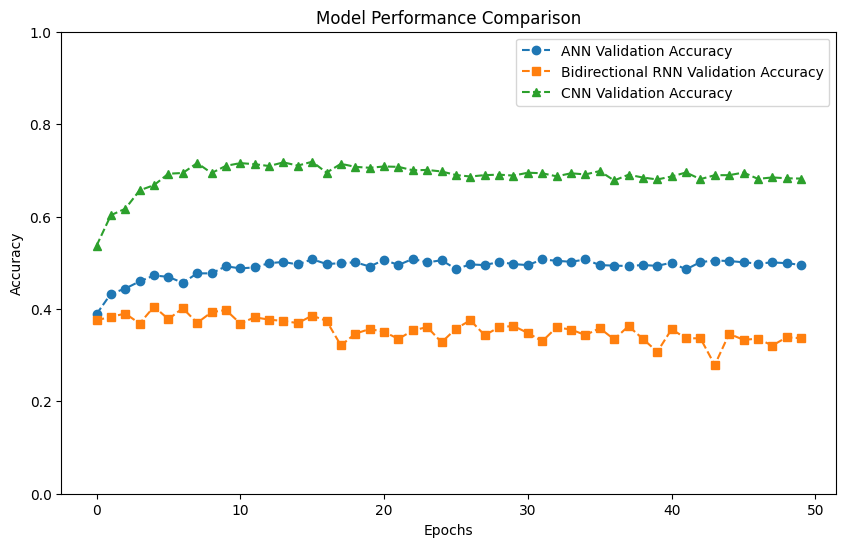

In [11]:
# Plotting the combined performance

plt.figure(figsize=(10, 6))
plt.title("Model Performance Comparison")

# ANN Performance
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy', linestyle='--', marker='o')

# RNN Performance
plt.plot(rnn_history.history['val_accuracy'], label='Bidirectional RNN Validation Accuracy', linestyle='--', marker='s')

# CNN Performance
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--', marker='^')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()